In [1]:
import numpy as np
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt

import pandas_profiling

In [2]:
train = pd.read_csv("data/aug_train.csv")

# DUMMY 1ST MODEL

In [3]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn import linear_model
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score


In [4]:
dummy_train = pd.get_dummies(train, drop_first=True)
dummy_train.target = train.target

In [5]:
dummy_train.head()

,enrollee_id,city_development_index,training_hours,target,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,0.920,36,1.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,29725,0.776,47,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,11561,0.624,83,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,33241,0.789,52,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,666,0.767,8,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [6]:
X = dummy_train.drop("target", axis=1)
y = dummy_train.target

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [8]:
folds = 10

In [9]:
skf = StratifiedKFold(n_splits=folds)
skf.get_n_splits(X, y)

10

In [10]:
roc_auc_avg = 0
k = 0
for train_index, test_index in skf.split(X, y):
    k+=1
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    
    lg = linear_model.LogisticRegression(max_iter=3000)
    lg.fit(X_train, y_train)
    
    roc_auc_avg += roc_auc_score(lg.predict(X_test), y_test)
    
    print("fold " + str(k) + " " + str(roc_auc_score(lg.predict(X_test), y_test)))
    
print("avg roc_auc score is " + str(roc_auc_avg/k))
    

fold 1 0.6716162601626017
fold 2 0.6949162042486408
fold 3 0.6946850290621562
fold 4 0.6949805585012372
fold 5 0.5727527239709442
fold 6 0.6949805585012372
fold 7 0.6784374794664563
fold 8 0.7121849962661536
fold 9 0.6580761776982708
fold 10 0.6752605549654805
avg roc_auc score is 0.6747890542843178


## for now, let's use models that can handle missing values

## scaling data

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [13]:
sca = StandardScaler()

In [14]:
train_std = train.copy()

In [15]:
train_std.loc[:, ["city_development_index", "training_hours"]] = sca.fit_transform(train_std.loc[:, ["city_development_index", "training_hours"]])

train_std = pd.get_dummies(train_std.iloc[:, :-1], drop_first=True)
train_std["target"] = train["target"]


In [16]:
X = train_std.drop("target", axis=1)
y = train_std.target

In [17]:
skf = StratifiedKFold(n_splits=folds)
skf.get_n_splits(X, y)

10

In [18]:
roc_auc_avg = 0
k = 0
for train_index, test_index in skf.split(X, y):
    k+=1
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    
    lg = linear_model.LogisticRegression(max_iter=3000)
    lg.fit(X_train, y_train)
    
    roc_auc_avg += roc_auc_score(lg.predict(X_test), y_test)
    
    print("fold " + str(k) + " " + str(roc_auc_score(lg.predict(X_test), y_test)))
    
print("avg roc_auc score is " + str(roc_auc_avg/k))

fold 1 0.701219244384712
fold 2 0.7154885082456598
fold 3 0.70567998385795
fold 4 0.706714194247439
fold 5 0.6697324978101207
fold 6 0.6717953195948305
fold 7 0.6811942929903033
fold 8 0.7159772182254197
fold 9 0.6762940847776192
fold 10 0.7106115754014247
avg roc_auc score is 0.6954706919535478


In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
skf = StratifiedKFold(n_splits=folds)
skf.get_n_splits(X, y)

10

In [21]:
roc_auc_avg = 0
k = 0
for train_index, test_index in skf.split(X, y):
    k+=1
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    
    roc_auc_avg += roc_auc_score(rfc.predict(X_test), y_test)
    
    print("fold " + str(k) + " " + str(roc_auc_score(rfc.predict(X_test), y_test)))
    
print("avg roc_auc score is " + str(roc_auc_avg/k))

fold 1 0.7119816603474202
fold 2 0.7281897314155378
fold 3 0.7158031286767937
fold 4 0.7178197255730676
fold 5 0.6725943094629155
fold 6 0.6978522405238545
fold 7 0.6877998110761449
fold 8 0.6933170471505841
fold 9 0.6740526066383737
fold 10 0.7140956164363236
avg roc_auc score is 0.7013505877301016


## try dropping missing data

In [22]:
dropped_train = train.copy()
dropped_train.dropna(inplace=True)

In [23]:
dropped_train.isnull().mean()

enrollee_id               0.0
city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
dtype: float64

In [24]:
dropped_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [25]:
dropped_train.reset_index(inplace=True)

In [26]:
dropped_train.drop("index", axis=1, inplace=True)

In [27]:
sca = StandardScaler()

dropped_train.loc[:, ["city_development_index", "training_hours"]] = sca.fit_transform(dropped_train.loc[:, ["city_development_index", "training_hours"]])

dropped_train_dummy = pd.get_dummies(dropped_train.iloc[:, :-1], drop_first=True)
dropped_train_dummy["target"] = dropped_train["target"]


In [28]:
X = dropped_train_dummy.drop("target", axis=1)
y = dropped_train_dummy.target

In [29]:
skf = StratifiedKFold(n_splits=folds)
skf.get_n_splits(X, y)

10

In [30]:
print(np.shape(X))
print(np.shape(y))

(8955, 168)
(8955,)


In [31]:
roc_auc_avg = 0
k = 0
for train_index, test_index in skf.split(X, y):
    k+=1
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    
    lg = linear_model.LogisticRegression(max_iter=3000)
    lg.fit(X_train, y_train)
    
    roc_auc_avg += roc_auc_score(lg.predict(X_test), y_test)
    
    print("fold " + str(k) + " " + str(roc_auc_score(lg.predict(X_test), y_test)))
    
print("avg roc_auc score is " + str(roc_auc_avg/k))

fold 1 0.7435190519298822
fold 2 0.7387254901960785
fold 3 0.7421086735166158
fold 4 0.7139127407751218
fold 5 0.7375788545082308
fold 6 0.7317747529611937
fold 7 0.7631206510201674
fold 8 0.6930729550478999
fold 9 0.6537776400882934
fold 10 0.7226422764227642
avg roc_auc score is 0.7240233086466248


In [32]:
skf = StratifiedKFold(n_splits=folds)
skf.get_n_splits(X, y)

10

In [33]:
roc_auc_avg = 0
k = 0
for train_index, test_index in skf.split(X, y):
    k+=1
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    
    roc_auc_avg += roc_auc_score(rfc.predict(X_test), y_test)
    
    print("fold " + str(k) + " " + str(roc_auc_score(rfc.predict(X_test), y_test)))
    
print("avg roc_auc score is " + str(roc_auc_avg/k))

fold 1 0.7676321233778446
fold 2 0.7566650740563784
fold 3 0.7343986588795155
fold 4 0.7427394315739193
fold 5 0.7238652665404258
fold 6 0.7219013798216036
fold 7 0.7310156835387437
fold 8 0.7220347155255545
fold 9 0.7082781700500147
fold 10 0.7491551590002917
avg roc_auc score is 0.7357685662364293


## dimensionality reduction

In [34]:
import seaborn as sns
sns.set_style("darkgrid")

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(random_state=0)

In [37]:
X_pca = pca.fit_transform(X)

In [38]:
pca.explained_variance_ratio_

array([9.99999938e-01, 1.13423817e-08, 1.00782542e-08, 2.68289431e-09,
       2.25500053e-09, 2.21219103e-09, 2.13496019e-09, 1.86768602e-09,
       1.80041570e-09, 1.49313444e-09, 1.40449138e-09, 1.28129336e-09,
       1.22289251e-09, 1.15932366e-09, 1.03536244e-09, 9.00699356e-10,
       8.65618529e-10, 8.02484899e-10, 7.39883753e-10, 6.87165274e-10,
       6.65372266e-10, 6.36752650e-10, 6.07985237e-10, 5.99959887e-10,
       5.91814373e-10, 5.64770572e-10, 5.47933184e-10, 5.28413018e-10,
       5.16246786e-10, 4.93431221e-10, 4.83747315e-10, 4.62057549e-10,
       4.48088217e-10, 4.33883778e-10, 4.18745505e-10, 3.81785729e-10,
       3.68033163e-10, 3.56816495e-10, 3.48189594e-10, 3.30920263e-10,
       3.05062623e-10, 2.97792773e-10, 2.90398793e-10, 2.75145743e-10,
       2.62204624e-10, 2.43720651e-10, 2.33590443e-10, 2.05963041e-10,
       1.94381994e-10, 1.91610381e-10, 1.88284580e-10, 1.68573701e-10,
       1.53256902e-10, 1.43051580e-10, 1.39111267e-10, 1.33253089e-10,
      

In [39]:
pca.components_[0]

array([-1.00000000e+00,  3.81508448e-06, -4.19078844e-07,  1.57267990e-07,
        2.02451714e-07,  9.91454239e-08,  2.07512973e-07, -7.67828154e-07,
        2.00867652e-07,  1.31462963e-07,  1.08718108e-08, -1.26391986e-08,
       -8.15290544e-09, -6.28039635e-08, -1.41048345e-07,  3.35731058e-09,
        1.08941343e-07,  3.70957887e-08, -5.09517274e-09,  1.70180267e-08,
        2.65134017e-08,  3.48805774e-09,  1.29553974e-08,  3.01293913e-08,
       -8.65013251e-09,  5.67125043e-08,  8.16109224e-09,  5.57157712e-08,
        3.59076377e-10,  1.74770056e-08, -2.02735972e-08, -1.27746903e-07,
        4.83327310e-08, -1.83415606e-08,  1.02730557e-08,  2.12618145e-09,
        1.60207931e-09, -6.11257466e-08,  2.81908231e-08, -1.02309597e-07,
        1.56089674e-08, -7.44013242e-08,  6.21425054e-08, -6.08909680e-09,
       -8.60869795e-09,  3.54708630e-08, -2.89818853e-08, -1.49984088e-08,
       -4.15553591e-07,  1.26775061e-07,  8.82817354e-08, -6.54888606e-08,
        6.54076055e-09, -

In [40]:
print(np.shape(X))
print(np.shape(pca.components_[0]))

(8955, 168)
(168,)


<IPython.core.display.Javascript object>


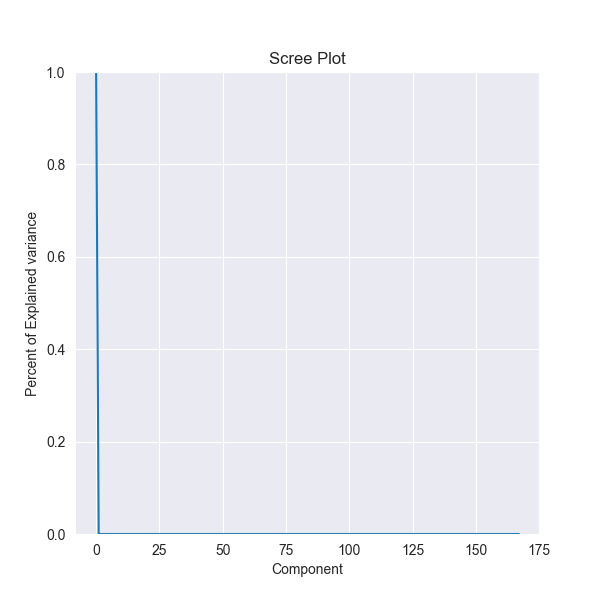

[Text(0.5, 0, 'Component'),
 Text(0, 0.5, 'Percent of Explained variance'),
 Text(0.5, 1.0, 'Scree Plot'),
 (0.0, 1.0)]

In [41]:

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(pca.explained_variance_ratio_)

ax.set(xlabel="Component", ylabel="Percent of Explained variance", title="Scree Plot", ylim=(0,1))

In [42]:
from sklearn.feature_selection import RFE

In [43]:
rfc = RandomForestClassifier(random_state=0)

In [44]:
rfe = RFE(rfc)

In [45]:
rfe.fit(X, y)

RFE(estimator=RandomForestClassifier(random_state=0))

In [46]:
rfe.ranking_

array([ 1,  1,  1, 17,  1,  1,  1,  1,  1, 58, 77, 62, 84,  1,  1,  4, 12,
       36,  8, 53, 34, 85,  1, 60, 81,  1, 79, 44, 68, 74, 13,  1, 28, 63,
       37, 57, 55,  3,  1,  1, 45, 61, 49, 14, 20, 52, 25, 16,  1,  1,  1,
        1, 50, 66, 10, 41, 46, 59, 31, 30, 80, 76,  1,  2, 21, 82, 51, 23,
        1, 71, 56,  1, 73, 70, 38,  5, 27, 47, 75, 40,  1, 43,  9, 15, 33,
       78, 18, 19,  1, 83,  1,  1,  1, 48, 64, 26,  1, 69,  1,  1,  1, 32,
       65,  1, 24, 42, 72,  1, 35,  1, 54, 29, 11,  6, 67, 22, 39,  7,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [47]:
rfe.estimator_.n_features_

84

In [48]:
rfe.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [49]:
rfe_cols = X.columns[rfe.support_]

In [50]:
rfe_cols

Index(['enrollee_id', 'city_development_index', 'training_hours',
       'city_city_100', 'city_city_101', 'city_city_102', 'city_city_103',
       'city_city_104', 'city_city_11', 'city_city_114', 'city_city_123',
       'city_city_128', 'city_city_136', 'city_city_144', 'city_city_145',
       'city_city_16', 'city_city_160', 'city_city_162', 'city_city_165',
       'city_city_21', 'city_city_28', 'city_city_36', 'city_city_46',
       'city_city_61', 'city_city_64', 'city_city_65', 'city_city_67',
       'city_city_71', 'city_city_73', 'city_city_74', 'city_city_75',
       'city_city_78', 'city_city_83', 'city_city_89', 'gender_Male',
       'gender_Other', 'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_Masters',
       'education_level_Phd', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 

In [51]:
X = X.loc[:, rfe_cols]

In [52]:
skf = StratifiedKFold(n_splits=folds)
skf.get_n_splits(X, y)

10

In [53]:
roc_auc_avg = 0
k = 0
for train_index, test_index in skf.split(X, y):
    k+=1
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    
    y_pred = rfc.predict(X_test)

    roc_auc_avg += roc_auc_score(y_pred, y_test)
        
    print("fold " + str(k) + " " + str(roc_auc_score(y_pred, y_test)))
    print('Accuracy: %f, \nRecall: %f \nPrecision: %f'
      % (accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred)))

    
print("avg roc_auc score is " + str(roc_auc_avg/k))

fold 1 0.7701149425287357
Accuracy: 0.863839, 
Recall: 0.371622 
Precision: 0.654762
fold 2 0.752248412258642
Accuracy: 0.858259, 
Recall: 0.364865 
Precision: 0.620690
fold 3 0.7335416666666668
Accuracy: 0.851562, 
Recall: 0.375839 
Precision: 0.583333
fold 4 0.7694888941963219
Accuracy: 0.867188, 
Recall: 0.456376 
Precision: 0.641509
fold 5 0.710518648018648
Accuracy: 0.842634, 
Recall: 0.375839 
Precision: 0.538462
fold 6 0.7273959447632015
Accuracy: 0.850279, 
Recall: 0.398649 
Precision: 0.567308
fold 7 0.7451860292423117
Accuracy: 0.856983, 
Recall: 0.398649 
Precision: 0.602041
fold 8 0.7139214383984059
Accuracy: 0.844693, 
Recall: 0.391892 
Precision: 0.542056
fold 9 0.7247352162400706
Accuracy: 0.849162, 
Recall: 0.391892 
Precision: 0.563107
fold 10 0.7583547397560916
Accuracy: 0.862570, 
Recall: 0.425676 
Precision: 0.623762
avg roc_auc score is 0.7405505932069095


In [54]:
roc_auc_avg = 0
k = 0
for train_index, test_index in skf.split(X, y):
    k+=1
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    
    lg = linear_model.LogisticRegression(max_iter=3000)
    lg.fit(X_train, y_train)
    
    y_pred = lg.predict(X_test)

    roc_auc_avg += roc_auc_score(y_pred, y_test)
        
    print("fold " + str(k) + " " + str(roc_auc_score(y_pred, y_test)))
    print('Accuracy: %f, \nRecall: %f \nPrecision: %f'
      % (accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred)))
    
print("avg roc_auc score is " + str(roc_auc_avg/k))

fold 1 0.7435190519298822
Accuracy: 0.850446, 
Recall: 0.243243 
Precision: 0.620690
fold 2 0.7387254901960785
Accuracy: 0.852679, 
Recall: 0.324324 
Precision: 0.600000
fold 3 0.7468112244897959
Accuracy: 0.858259, 
Recall: 0.449664 
Precision: 0.598214
fold 4 0.7139127407751218
Accuracy: 0.842634, 
Recall: 0.234899 
Precision: 0.564516
fold 5 0.7375788545082308
Accuracy: 0.850446, 
Recall: 0.295302 
Precision: 0.602740
fold 6 0.7317747529611937
Accuracy: 0.852514, 
Recall: 0.452703 
Precision: 0.567797
fold 7 0.7631206510201674
Accuracy: 0.855866, 
Recall: 0.270270 
Precision: 0.655738
fold 8 0.6930729550478999
Accuracy: 0.837989, 
Recall: 0.243243 
Precision: 0.521739
fold 9 0.6537776400882934
Accuracy: 0.827933, 
Recall: 0.189189 
Precision: 0.451613
fold 10 0.7226422764227642
Accuracy: 0.846927, 
Recall: 0.290541 
Precision: 0.573333
avg roc_auc score is 0.7244935637439428
